In [55]:
import numpy as np
from matplotlib import pyplot as plt 
import math
from scipy import integrate

LENSFOCAL = 502.5 # this is in mm
ZERO_X = 5280/2
ZERO_Y = 4600 /2

def RMS(array):
    """
    calculates the root mean square value of any array
    :param array: input array for which the RMS calculation is needed
    :return: an RMS value, same units as array.
    """
    """mysum = np.sum(array)
    nr_of_points = len(array)"""
    RMS = np.sqrt(np.mean(array**2))
    return (RMS)

def FOP_smoothing( arrayX):
    """"
    This function is designed to smooth out the Fuck Off Points (FOP) in the measurement.
    Those points are the ones sticking out of the curve by more than 4 times the RMS.
    The function calculates the average of the 2 point either side of the FOP, and replaces the FOP with the average.

    :param arrayX: an array of slopes.
    :return: an array of smoothed slopes
    """
    smoothed_array = arrayX # first just a copy
    rms = RMS(arrayX)
    topvalue = 4 * rms
    FOP = [] # array of indices of Fuck Off Points
    for i in range(len(arrayX)):
        if arrayX[i] >= topvalue:
            FOP.append(i)
    for i in FOP:
        smoothed_array[i] = (arrayX[i - 1] + arrayX[i + 1]) / 2 # substituting the FOPs with the average in the smoothed array.
    return (smoothed_array)

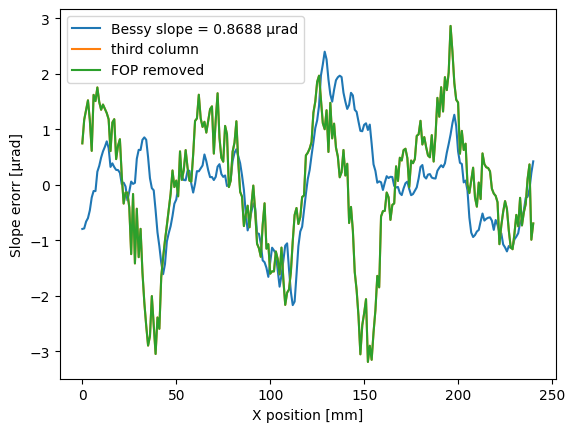

1.2056537827949065e-06 1.2056537827949065e-06


In [58]:
bessy= np.loadtxt("bessy.slp")
bessy_slope = bessy [:,1]
#print(bessy[:,0])
#print(bessy_slope)
#arrayX = bessy[:,0]
mine = np.loadtxt("Xpos_slopes11-12_20251127.txt", skiprows = 1)
mine_slope = mine[:,1]
mine_second = mine[:,2]
smoothed_mine = FOP_smoothing(mine_second)

plt.figure()
plt.plot(bessy[:,0], bessy_slope, label = "Bessy slope = 0.8688 µrad")
#plt.plot(bessy[:,0], mine_slope * 1000000, label = "second column")
plt.plot(bessy[:,0], mine_second*1000000, label = "third column")
plt.plot(bessy[:,0], smoothed_mine * 1000000, label = "FOP removed")
plt.xlabel("X position [mm]")
plt.ylabel("Slope erorr [µrad]")
plt.legend()
plt.show()

print(RMS(mine_second), RMS(smoothed_mine))

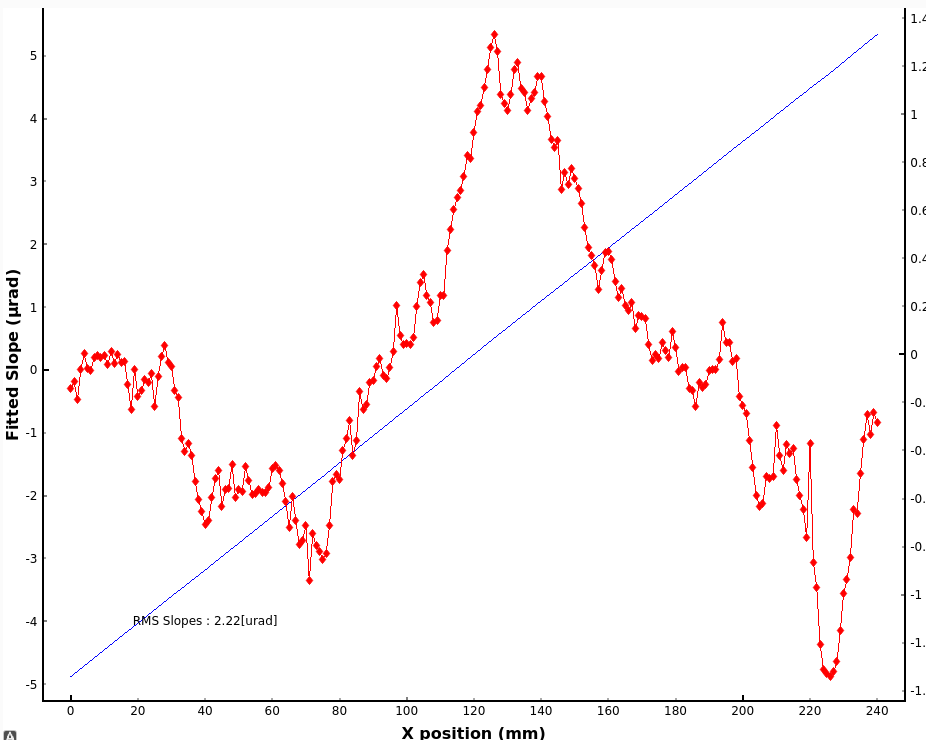


this is with 3000 grabs per point, focal = 502.5 mm

In [2]:
bessy= np.loadtxt("bessy.slp")
bessy_slope = bessy [:,1]

#print(bessy_slope)
#arrayX = bessy[:,0]


In [44]:
ltp_data = np.loadtxt("FullData11-12_20251127.txt", skiprows = 8)
#slope_file = np.loadtxt("Xpos_slopes14-17_20250121.txt", skiprows = 1 )
#slope_data = slope_file[:,1]
#slope_X = slope_file[:,0]
#slopeXpos = slope_X - slope_X[0]
#print(slope_data)
#ltp_data = np.loadtxt("FullData16-58_20250116.txt", skiprows = 7) this is the best dataset so far. 
#LTP data is X pos, Y Pos, Average Centroid X, Average Centroid Y, so I need the last column)
avgX = ltp_data[:,2]
avgY = ltp_data[:,3]
#print(ltp_data)
x_column = ltp_data[:,0]
diff = x_column[-1] - x_column[0]
print(diff)
startPos = x_column[0]
Xpos = np.arange(0,len(x_column), 1)

#print(avgX - avgY)


238999.66000000003


In [42]:
def slope_calc(value, focal):
    slope_error =  0.5 *(math.atan((2.74 * (ZERO_Y - value))/(focal* 1000))) # this is in microns, so in µrad? 
    return(slope_error)
def my_fit (arrayX, arrayY, order):
    coeff = np.polyfit(arrayX, arrayY, order)
    p = np.poly1d(coeff)
    fit = p(arrayX)
    radius = 1 /coeff[0]
    return(fit, radius)
def RMS(array):
    RMS = np.sqrt(np.mean(array**2))
    return(RMS)

def figure_error(arrayX, arrayY):
    """
    Calculates the figure error given and array of positions/slopes
    :param arrayX: y-position of the centroid? or X-position of the head?
    :param arrayY: slopes
    :return: an array, heights.
    """

    heights = []
    heights = integrate.cumtrapz(arrayX, arrayY, initial=0)
    return (heights)

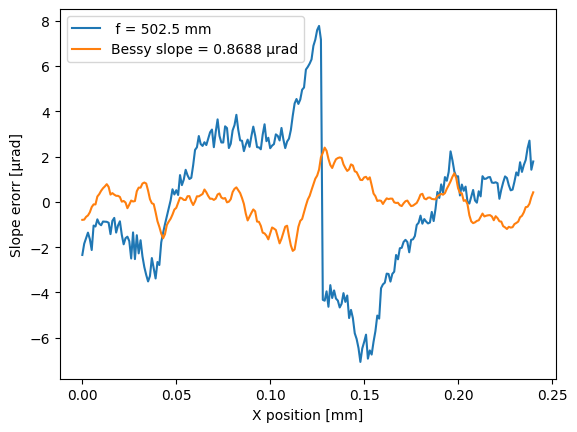

'\nheights_bessy = figure_error(Xpos, bessy_slope)\nprint(RMS(slope_array_500-fit_500))\nprint(rms_heights)\nprint("bessy heights rms: ", RMS(heights_bessy)/1000)\nprint(RMS(bessy_slope))'

In [43]:
slope_array_600 = np.zeros(len(avgY))

for i in range (len(avgY)):
    slope_array_600 [i] = slope_calc(avgY[i], focal = 510)
    #print(slope_array[i])
fit_600, radius_600 = my_fit(Xpos, slope_array_600, 1)

slope_array_500 = np.zeros(len(avgY))
for i in range (len(avgY)):
    slope_array_500 [i] = slope_calc(avgY[i], focal = 502.5)
    #print(slope_array[i])
fit_500, radius_500 = my_fit(Xpos, slope_array_500, 1)

slope_array_400 = np.zeros(len(avgY))

for i in range (len(avgY)):
    slope_array_400 [i] = slope_calc(avgY[i], focal = 490)
    #print(slope_array[i])
fit_400, radius_400 = my_fit(Xpos, slope_array_400, 1)

"""slope, fit = my_fit(slopeXpos, slope_data, 1)
heights = figure_error(Xpos,slope_array_500 - fit_500 )
rms_heights = RMS(heights)"""

plt.figure()
#plt.plot(Xpos/1000, (slope_array_600 - fit_600) *1000000, label = "f = 510 mm")
plt.plot(Xpos/1000, (slope_array_500 - fit_500 )* 1000000, label = " f = 502.5 mm")
#plt.plot(Xpos/1000, (slope_array_400 - fit_400 )* 1000000, label = "f = 490 mm")
plt.plot(Xpos/1000, bessy_slope, label = "Bessy slope = 0.8688 µrad")

plt.xlabel("X position [mm]")
plt.ylabel("Slope erorr [µrad]")
plt.legend()
plt.show()
"""
heights_bessy = figure_error(Xpos, bessy_slope)
print(RMS(slope_array_500-fit_500))
print(rms_heights)
print("bessy heights rms: ", RMS(heights_bessy)/1000)
print(RMS(bessy_slope))"""